## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 29s 0us/step


In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [4]:
def build_mlp():
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model
model = build_mlp()

In [5]:
"""
Compile 模型
"""
model.summary()

optimizer = keras.optimizers.SGD(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [6]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs= 500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 5s 92us/step - loss: 2.2742 - accuracy: 0.1529 - val_loss: 2.2200 - val_accuracy: 0.1886
Epoch 2/500
50000/50000 [==============================] - 5s 93us/step - loss: 2.1845 - accuracy: 0.2149 - val_loss: 2.1509 - val_accuracy: 0.2322
Epoch 3/500
50000/50000 [==============================] - 5s 92us/step - loss: 2.1216 - accuracy: 0.2475 - val_loss: 2.0928 - val_accuracy: 0.2649
Epoch 4/500
50000/50000 [==============================] - 4s 83us/step - loss: 2.0713 - accuracy: 0.2687 - val_loss: 2.0485 - val_accuracy: 0.2777
Epoch 5/500
50000/50000 [==============================] - 4s 78us/step - loss: 2.0323 - accuracy: 0.2816 - val_loss: 2.0137 - val_accuracy: 0.2937
Epoch 6/500
50000/50000 [==============================] - 4s 81us/step - loss: 2.0012 - accuracy: 0.2942 - val_loss: 1.9854 - val_accuracy: 0.3022
Epoch 7/500
50000/50000 [==============================] - 4s 

Epoch 56/500
50000/50000 [==============================] - 4s 83us/step - loss: 1.6596 - accuracy: 0.4181 - val_loss: 1.6644 - val_accuracy: 0.4218
Epoch 57/500
50000/50000 [==============================] - 4s 88us/step - loss: 1.6563 - accuracy: 0.4198 - val_loss: 1.6603 - val_accuracy: 0.4189
Epoch 58/500
50000/50000 [==============================] - 5s 90us/step - loss: 1.6532 - accuracy: 0.4212 - val_loss: 1.6583 - val_accuracy: 0.4238
Epoch 59/500
50000/50000 [==============================] - 4s 88us/step - loss: 1.6500 - accuracy: 0.4225 - val_loss: 1.6556 - val_accuracy: 0.4202
Epoch 60/500
50000/50000 [==============================] - 4s 90us/step - loss: 1.6470 - accuracy: 0.4240 - val_loss: 1.6534 - val_accuracy: 0.4247
Epoch 61/500
50000/50000 [==============================] - 4s 87us/step - loss: 1.6440 - accuracy: 0.4242 - val_loss: 1.6488 - val_accuracy: 0.4259
Epoch 62/500
50000/50000 [==============================] - 4s 82us/step - loss: 1.6409 - accuracy: 0.4248

Epoch 111/500
50000/50000 [==============================] - 4s 81us/step - loss: 1.5245 - accuracy: 0.4683 - val_loss: 1.5509 - val_accuracy: 0.4538
Epoch 112/500
50000/50000 [==============================] - 4s 80us/step - loss: 1.5227 - accuracy: 0.4682 - val_loss: 1.5468 - val_accuracy: 0.4568
Epoch 113/500
50000/50000 [==============================] - 4s 80us/step - loss: 1.5207 - accuracy: 0.4697 - val_loss: 1.5438 - val_accuracy: 0.4579
Epoch 114/500
50000/50000 [==============================] - 4s 81us/step - loss: 1.5193 - accuracy: 0.4694 - val_loss: 1.5485 - val_accuracy: 0.4547
Epoch 115/500
50000/50000 [==============================] - 4s 80us/step - loss: 1.5170 - accuracy: 0.4708 - val_loss: 1.5442 - val_accuracy: 0.4580
Epoch 116/500
50000/50000 [==============================] - 4s 80us/step - loss: 1.5154 - accuracy: 0.4716 - val_loss: 1.5422 - val_accuracy: 0.4598
Epoch 117/500
50000/50000 [==============================] - 5s 92us/step - loss: 1.5137 - accuracy:

50000/50000 [==============================] - 4s 87us/step - loss: 1.4350 - accuracy: 0.5012 - val_loss: 1.4842 - val_accuracy: 0.4790
Epoch 166/500
50000/50000 [==============================] - 4s 86us/step - loss: 1.4333 - accuracy: 0.5012 - val_loss: 1.4922 - val_accuracy: 0.4767
Epoch 167/500
50000/50000 [==============================] - 4s 88us/step - loss: 1.4323 - accuracy: 0.5020 - val_loss: 1.4852 - val_accuracy: 0.4764
Epoch 168/500
50000/50000 [==============================] - 5s 91us/step - loss: 1.4304 - accuracy: 0.5027 - val_loss: 1.4785 - val_accuracy: 0.4782
Epoch 169/500
50000/50000 [==============================] - 5s 91us/step - loss: 1.4287 - accuracy: 0.5020 - val_loss: 1.4792 - val_accuracy: 0.4779
Epoch 170/500
50000/50000 [==============================] - 4s 87us/step - loss: 1.4276 - accuracy: 0.5038 - val_loss: 1.4892 - val_accuracy: 0.4769
Epoch 171/500
50000/50000 [==============================] - 4s 86us/step - loss: 1.4263 - accuracy: 0.5041 - val_

Epoch 220/500
50000/50000 [==============================] - 4s 88us/step - loss: 1.3580 - accuracy: 0.5263 - val_loss: 1.4383 - val_accuracy: 0.4920
Epoch 221/500
50000/50000 [==============================] - 5s 95us/step - loss: 1.3570 - accuracy: 0.5268 - val_loss: 1.4344 - val_accuracy: 0.4936
Epoch 222/500
50000/50000 [==============================] - 5s 98us/step - loss: 1.3556 - accuracy: 0.5274 - val_loss: 1.4281 - val_accuracy: 0.4976
Epoch 223/500
50000/50000 [==============================] - 5s 96us/step - loss: 1.3545 - accuracy: 0.5279 - val_loss: 1.4329 - val_accuracy: 0.4967
Epoch 224/500
50000/50000 [==============================] - 5s 92us/step - loss: 1.3523 - accuracy: 0.5287 - val_loss: 1.4307 - val_accuracy: 0.4947
Epoch 225/500
50000/50000 [==============================] - 5s 93us/step - loss: 1.3516 - accuracy: 0.5285 - val_loss: 1.4266 - val_accuracy: 0.4938
Epoch 226/500
50000/50000 [==============================] - 4s 88us/step - loss: 1.3502 - accuracy:

50000/50000 [==============================] - 4s 86us/step - loss: 1.2908 - accuracy: 0.5486 - val_loss: 1.3943 - val_accuracy: 0.5100
Epoch 275/500
50000/50000 [==============================] - 4s 87us/step - loss: 1.2894 - accuracy: 0.5498 - val_loss: 1.4000 - val_accuracy: 0.5041
Epoch 276/500
50000/50000 [==============================] - 5s 95us/step - loss: 1.2884 - accuracy: 0.5512 - val_loss: 1.4063 - val_accuracy: 0.4987
Epoch 277/500
50000/50000 [==============================] - 5s 90us/step - loss: 1.2868 - accuracy: 0.5507 - val_loss: 1.3990 - val_accuracy: 0.5045
Epoch 278/500
50000/50000 [==============================] - 4s 89us/step - loss: 1.2853 - accuracy: 0.5516 - val_loss: 1.4127 - val_accuracy: 0.5007
Epoch 279/500
50000/50000 [==============================] - 4s 88us/step - loss: 1.2847 - accuracy: 0.5532 - val_loss: 1.3992 - val_accuracy: 0.5052
Epoch 280/500
50000/50000 [==============================] - 4s 86us/step - loss: 1.2834 - accuracy: 0.5524 - val_

Epoch 329/500
50000/50000 [==============================] - 5s 91us/step - loss: 1.2271 - accuracy: 0.5735 - val_loss: 1.3871 - val_accuracy: 0.5099
Epoch 330/500
50000/50000 [==============================] - 5s 91us/step - loss: 1.2264 - accuracy: 0.5717 - val_loss: 1.3869 - val_accuracy: 0.5133
Epoch 331/500
50000/50000 [==============================] - 5s 96us/step - loss: 1.2251 - accuracy: 0.5729 - val_loss: 1.3854 - val_accuracy: 0.5104
Epoch 332/500
50000/50000 [==============================] - 5s 90us/step - loss: 1.2231 - accuracy: 0.5748 - val_loss: 1.3825 - val_accuracy: 0.5108
Epoch 333/500
50000/50000 [==============================] - 4s 88us/step - loss: 1.2224 - accuracy: 0.5736 - val_loss: 1.3828 - val_accuracy: 0.5150
Epoch 334/500
50000/50000 [==============================] - 4s 88us/step - loss: 1.2216 - accuracy: 0.5738 - val_loss: 1.3648 - val_accuracy: 0.5195
Epoch 335/500
50000/50000 [==============================] - 5s 97us/step - loss: 1.2198 - accuracy:

50000/50000 [==============================] - 4s 88us/step - loss: 1.1686 - accuracy: 0.5919 - val_loss: 1.3585 - val_accuracy: 0.5218
Epoch 384/500
50000/50000 [==============================] - 5s 91us/step - loss: 1.1670 - accuracy: 0.5929 - val_loss: 1.3525 - val_accuracy: 0.5236
Epoch 385/500
50000/50000 [==============================] - 5s 91us/step - loss: 1.1656 - accuracy: 0.5943 - val_loss: 1.3544 - val_accuracy: 0.5245
Epoch 386/500
50000/50000 [==============================] - 5s 91us/step - loss: 1.1651 - accuracy: 0.5941 - val_loss: 1.3574 - val_accuracy: 0.5218
Epoch 387/500
50000/50000 [==============================] - 4s 89us/step - loss: 1.1636 - accuracy: 0.5953 - val_loss: 1.3758 - val_accuracy: 0.5107
Epoch 388/500
50000/50000 [==============================] - 4s 90us/step - loss: 1.1629 - accuracy: 0.5955 - val_loss: 1.3580 - val_accuracy: 0.5200
Epoch 389/500
50000/50000 [==============================] - 5s 95us/step - loss: 1.1629 - accuracy: 0.5944 - val_

Epoch 438/500
50000/50000 [==============================] - 4s 89us/step - loss: 1.1111 - accuracy: 0.6123 - val_loss: 1.3629 - val_accuracy: 0.5215
Epoch 439/500
50000/50000 [==============================] - 4s 88us/step - loss: 1.1113 - accuracy: 0.6122 - val_loss: 1.3456 - val_accuracy: 0.5265
Epoch 440/500
50000/50000 [==============================] - 4s 89us/step - loss: 1.1082 - accuracy: 0.6133 - val_loss: 1.3538 - val_accuracy: 0.5212
Epoch 441/500
50000/50000 [==============================] - 4s 88us/step - loss: 1.1084 - accuracy: 0.6123 - val_loss: 1.3710 - val_accuracy: 0.5187
Epoch 442/500
50000/50000 [==============================] - 4s 88us/step - loss: 1.1093 - accuracy: 0.6143 - val_loss: 1.3442 - val_accuracy: 0.5238
Epoch 443/500
50000/50000 [==============================] - 5s 96us/step - loss: 1.1071 - accuracy: 0.6127 - val_loss: 1.3409 - val_accuracy: 0.5258
Epoch 444/500
50000/50000 [==============================] - 5s 93us/step - loss: 1.1046 - accuracy:

50000/50000 [==============================] - 5s 93us/step - loss: 1.0559 - accuracy: 0.6328 - val_loss: 1.3749 - val_accuracy: 0.5170
Epoch 493/500
50000/50000 [==============================] - 4s 90us/step - loss: 1.0560 - accuracy: 0.6305 - val_loss: 1.3588 - val_accuracy: 0.5201
Epoch 494/500
50000/50000 [==============================] - 5s 90us/step - loss: 1.0538 - accuracy: 0.6331 - val_loss: 1.4651 - val_accuracy: 0.4938
Epoch 495/500
50000/50000 [==============================] - 5s 91us/step - loss: 1.0540 - accuracy: 0.6337 - val_loss: 1.3455 - val_accuracy: 0.5235
Epoch 496/500
50000/50000 [==============================] - 5s 99us/step - loss: 1.0520 - accuracy: 0.6332 - val_loss: 1.3580 - val_accuracy: 0.5228
Epoch 497/500
50000/50000 [==============================] - 5s 91us/step - loss: 1.0512 - accuracy: 0.6350 - val_loss: 1.3909 - val_accuracy: 0.5171
Epoch 498/500
50000/50000 [==============================] - 5s 91us/step - loss: 1.0507 - accuracy: 0.6337 - val_

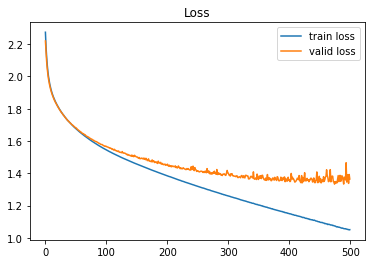

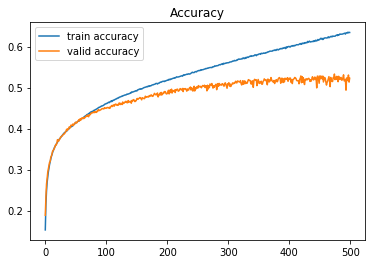

In [8]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()